# Displaying data

In [157]:
%matplotlib inline

# Import dependencies
import h5py
import numpy as np
from matplotlib import pyplot as plt
import fastmri
from fastmri.data import transforms as T

In [158]:
# Define paths to image
original_image_name = ""
image_base_dir = "/media/drazen/Transcend/MRI"
image_name = "file_brain_AXFLAIR_200_6002564.h5"

In [159]:
# Define which slice we look for easier comparison
mri_slice = 9

## Original image

We'll import fully sampled image, display it, generate some noise on it and run it through our models.

## Original image

In [160]:
hf = h5py.File(image_base_dir + "/multicoil_temp/" + image_name)
# hf = h5py.File("/media/drazen/Transcend/MRI/multicoil_temp/file_brain_AXFLAIR_200_6002564.h5")

print('Keys: ', list(hf.keys()))
print('Keys: ', dict(hf.attrs))

Keys:  ['ismrmrd_header', 'kspace', 'mask']
Keys:  {'acceleration': 8, 'acquisition': 'AXFLAIR', 'num_low_frequency': 13, 'patient_id': 'edf352ae5325ef3f498d1950993f2ee3a44b27e460366371e0111dcbe62509a4'}


Showing kspace parameters.

In [161]:
volume_kspace = hf['kspace'][()]
print(volume_kspace.dtype)
print(volume_kspace.shape)

complex64
(16, 20, 640, 320)


First parameter represents number of slices.

Choosing the 10-th slice of this volume

In [162]:
slice_kspace = volume_kspace[mri_slice]

Absolute value of k-space

In [163]:
def show_coils(data, slice_nums, cmap=None):
    fig = plt.figure()
    for i, num in enumerate(slice_nums):
        plt.subplot(1, len(slice_nums), i + 1)
        plt.imshow(data[num], cmap=cmap)

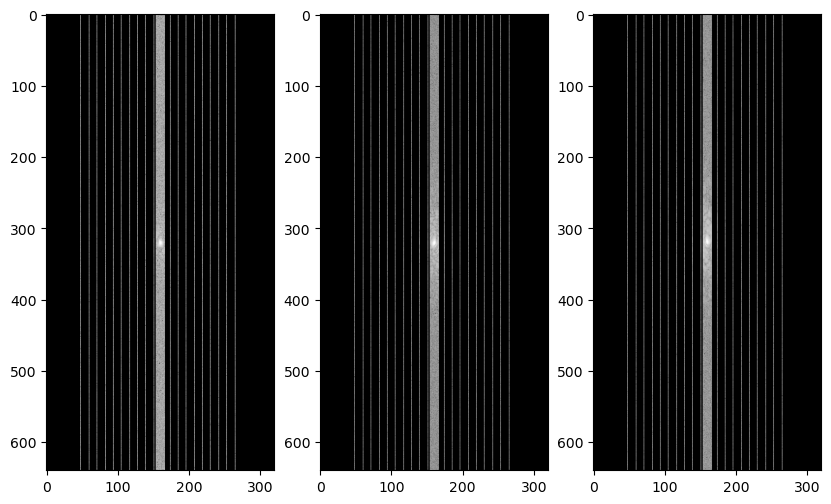

In [164]:
show_coils(np.log(np.abs(slice_kspace) + 1e-9), [0, 5, 10], cmap='gray')  # This shows coils 0, 5 and 10

The fastMRI repo contains some utlity functions to convert k-space into image space. These functions work on PyTorch Tensors. The to_tensor function can convert Numpy arrays to PyTorch Tensors.

In [165]:
slice_kspace2 = T.to_tensor(slice_kspace)      # Convert from numpy array to pytorch tensor
slice_image = fastmri.ifft2c(slice_kspace2)           # Apply Inverse Fourier Transform to get the complex image
slice_image_abs = fastmri.complex_abs(slice_image)   # Compute absolute value to get a real image

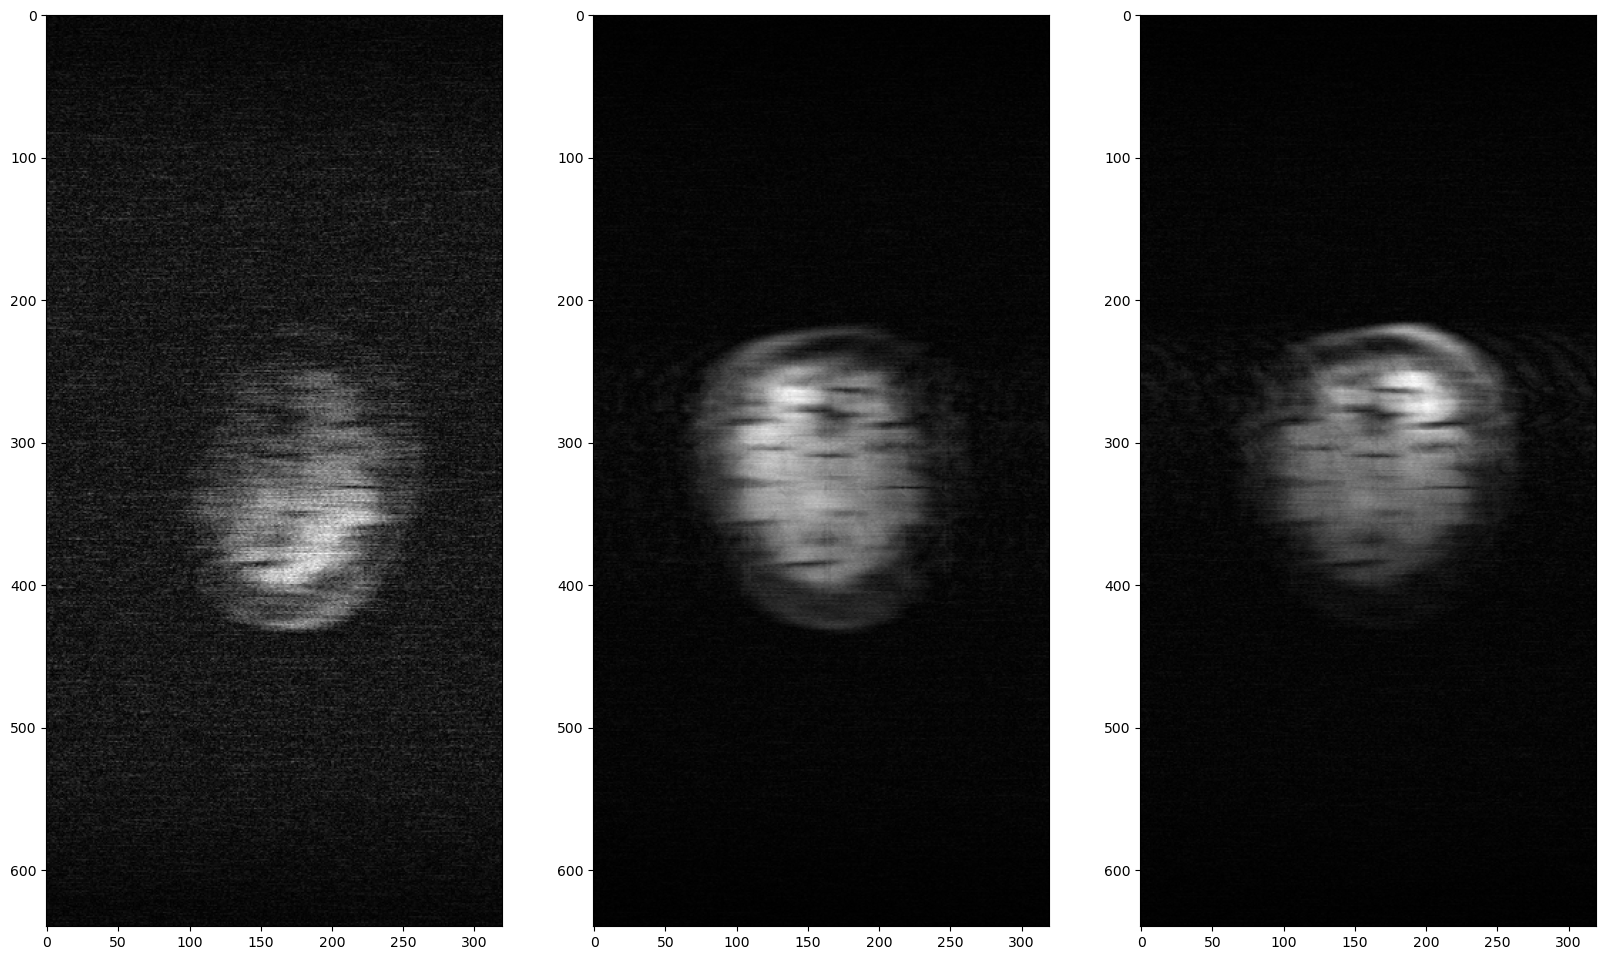

In [166]:
plt.rcParams['figure.figsize'] = [20, 16] # enlarge inline plots

show_coils(slice_image_abs, [0, 5, 10], cmap='gray')

As we can see, each coil in a multi-coil MRI scan focusses on a different region of the image. These coils can be combined into the full image using the Root-Sum-of-Squares (RSS) transform.

In [167]:
slice_image_rss = fastmri.rss(slice_image_abs, dim=0)

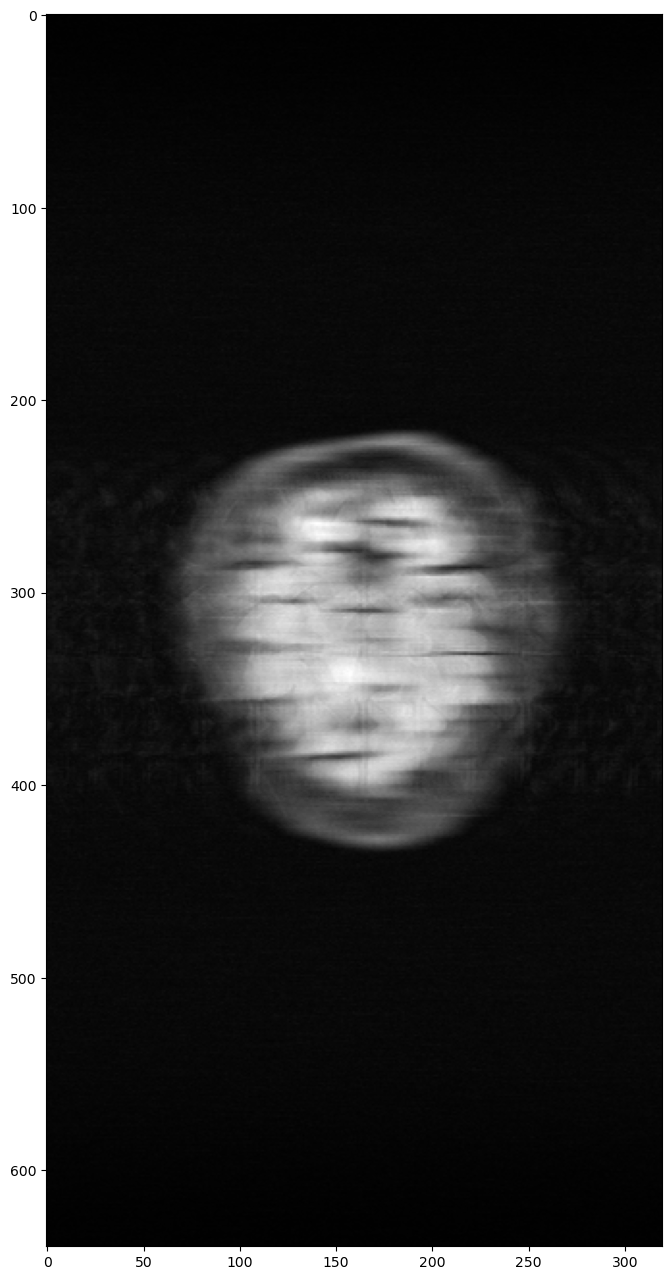

In [168]:
plt.imshow(np.abs(slice_image_rss.numpy()), cmap='gray')

## Functions

In [169]:
def show_slices(data, num_slices, cmap=None):
    fig = plt.figure()
    for i in range(0, num_slices):
        plt.subplot(3, 5, i + 1)
        plt.imshow(data[i], cmap=cmap)

## Zero-Filled

In [170]:
hf = h5py.File(image_base_dir + "/outputs/zero_filled/" + image_name)

In [171]:
print('Keys:', list(hf.keys()))
print('Attrs:', dict(hf.attrs))

Keys: ['reconstruction']
Attrs: {}


We don't have `kspace` key anymore, now we have to use `reconstruction` key.

`Reconstruction` volume has the following shape: (number of slices, height, width).

In [172]:
zf_volume_reconstruction = hf['reconstruction'][()]
print(zf_volume_reconstruction.dtype)
print(zf_volume_reconstruction.shape)

float32
(16, 640, 320)


In [173]:
zf_slice_reconstruction = zf_volume_reconstruction[mri_slice] # Choosing slice
print(zf_slice_reconstruction.shape)

(640, 320)


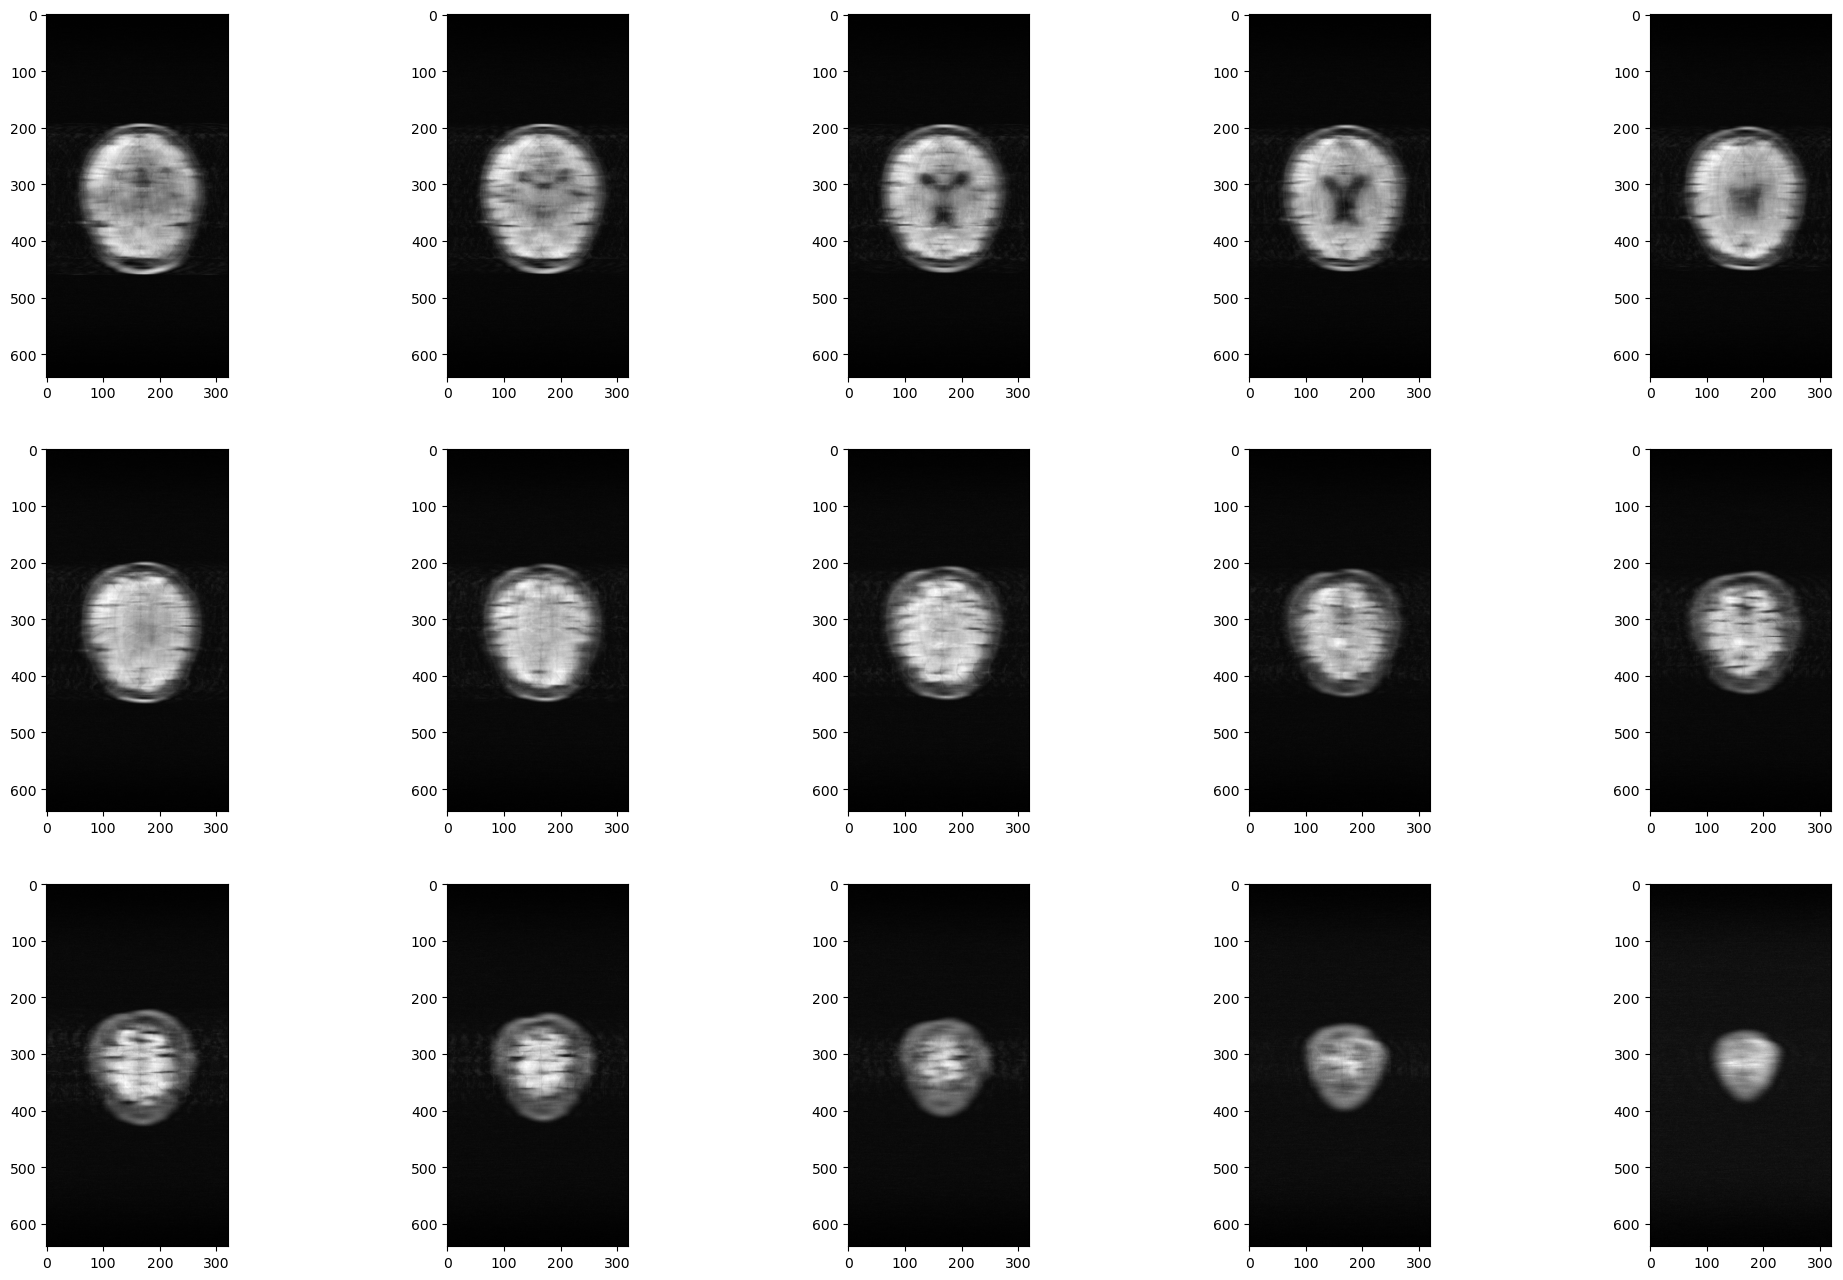

In [174]:
plt.rcParams['figure.figsize'] = [25, 16] # enlarge inline plots

show_slices(zf_volume_reconstruction, 15, cmap='gray')

# fig = plt.figure()
# plt.imshow(slice_reconstruction, cmap='gray')

Let's show 10th slice.

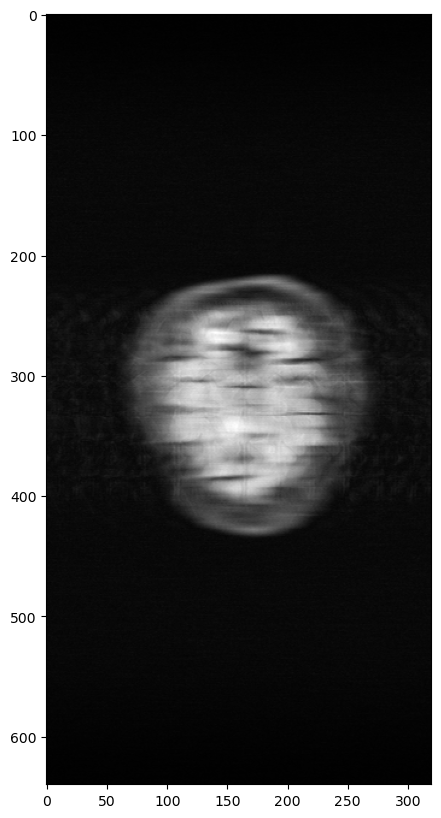

In [175]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(zf_slice_reconstruction, cmap='gray')

## Compressed Sensing

In [176]:
hf = h5py.File(image_base_dir + "/outputs/cs/" + image_name)

In [177]:
print('Keys:', list(hf.keys()))
print('Attrs:', dict(hf.attrs))

Keys: ['reconstruction']
Attrs: {}


We don't have `kspace` key anymore, now we have to use `reconstruction` key.

`Reconstruction` volume has the following shape: (number of slices, height, width).

In [178]:
cs_volume_reconstruction = hf['reconstruction'][()]
print(cs_volume_reconstruction.dtype)
print(cs_volume_reconstruction.shape)

float32
(16, 320, 320)


In [179]:
cs_slice_reconstruction = cs_volume_reconstruction[mri_slice] # Choosing slice
print(cs_slice_reconstruction.shape)

(320, 320)


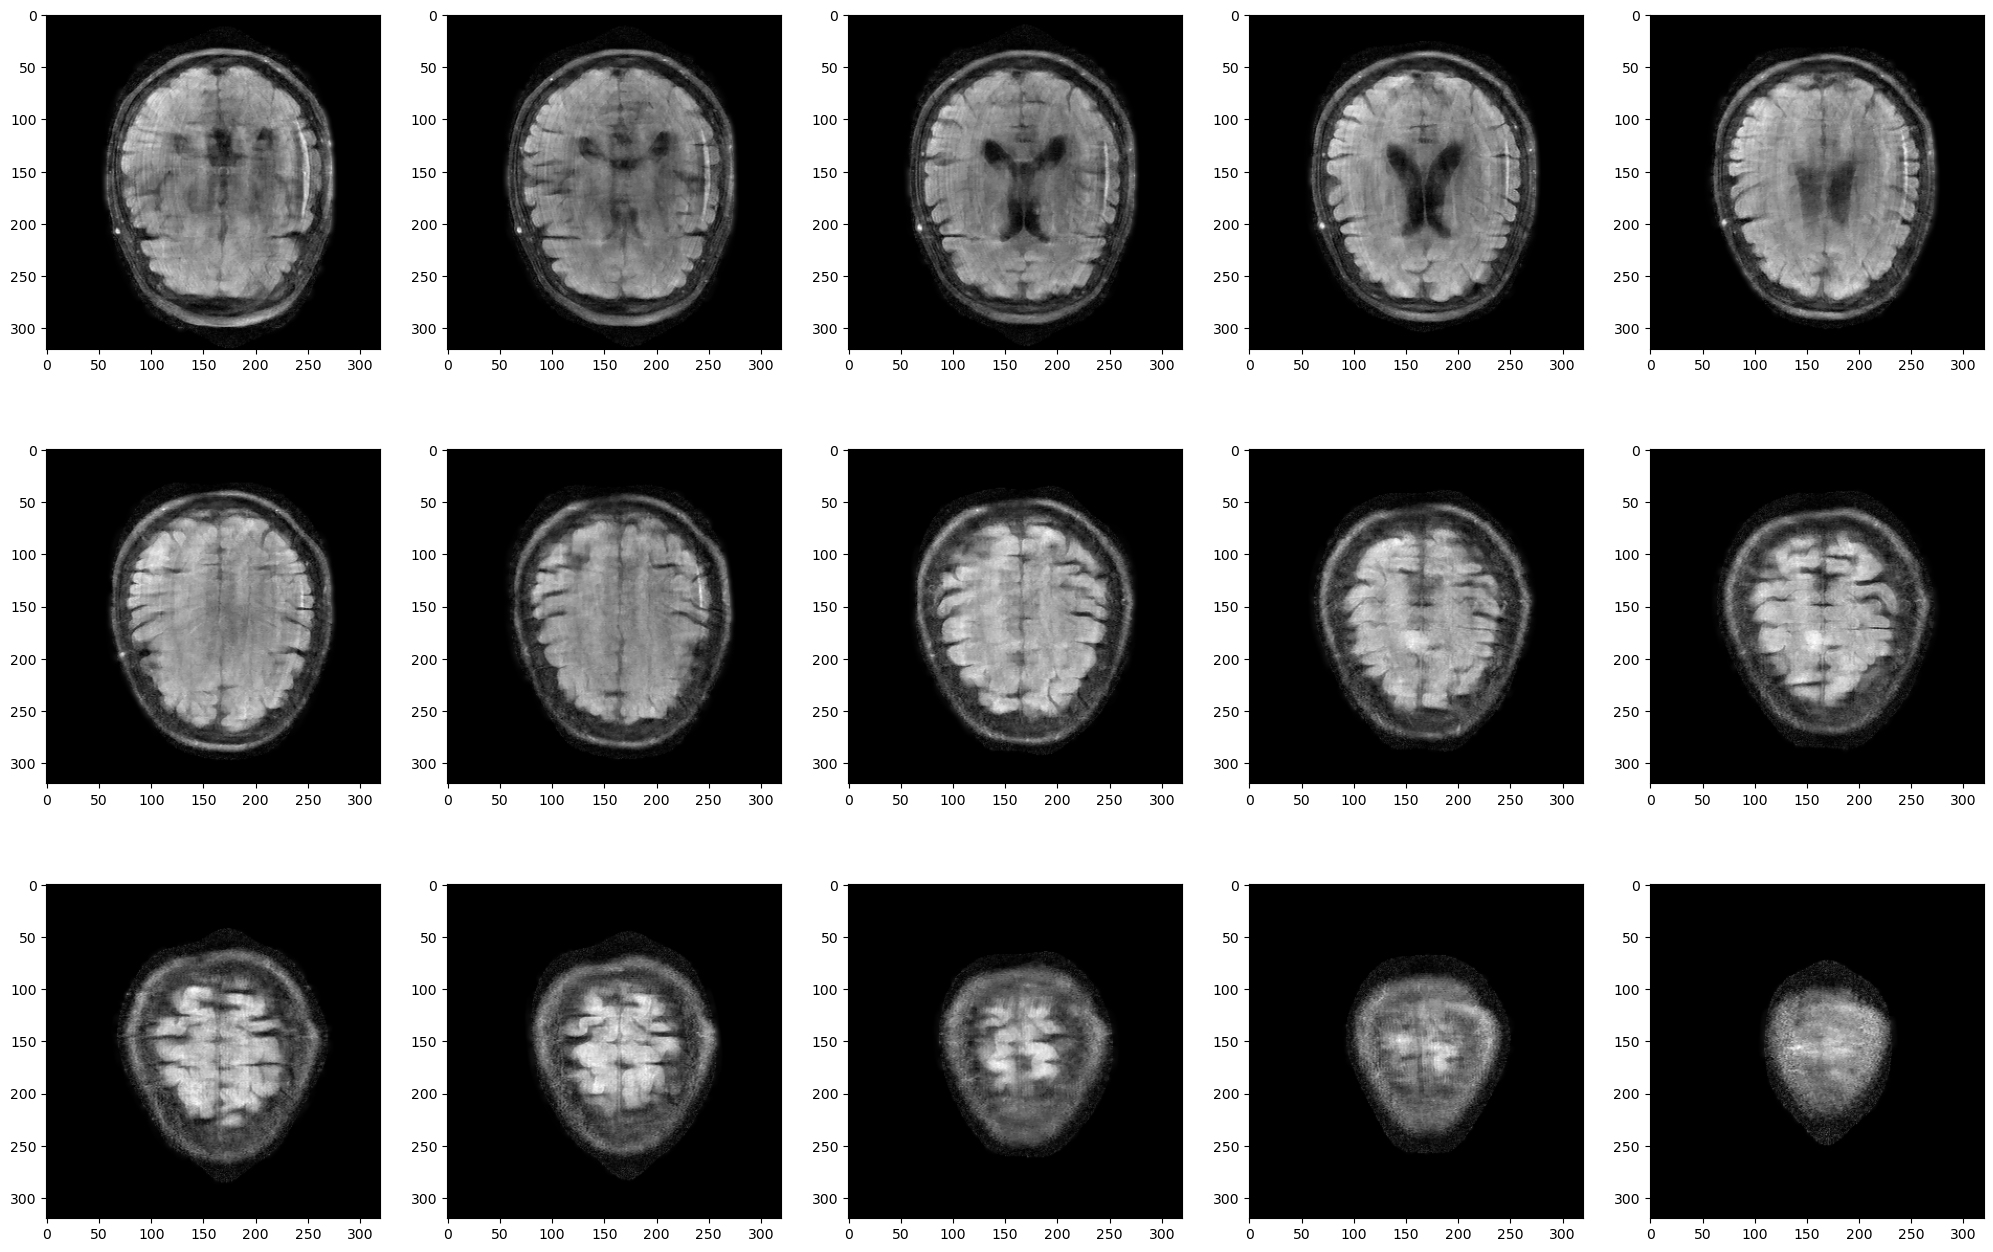

In [180]:
plt.rcParams['figure.figsize'] = [25, 16] # enlarge inline plots

show_slices(cs_volume_reconstruction, 15, cmap='gray')

# fig = plt.figure()
# plt.imshow(slice_reconstruction, cmap='gray')

Let's show 10th slice.

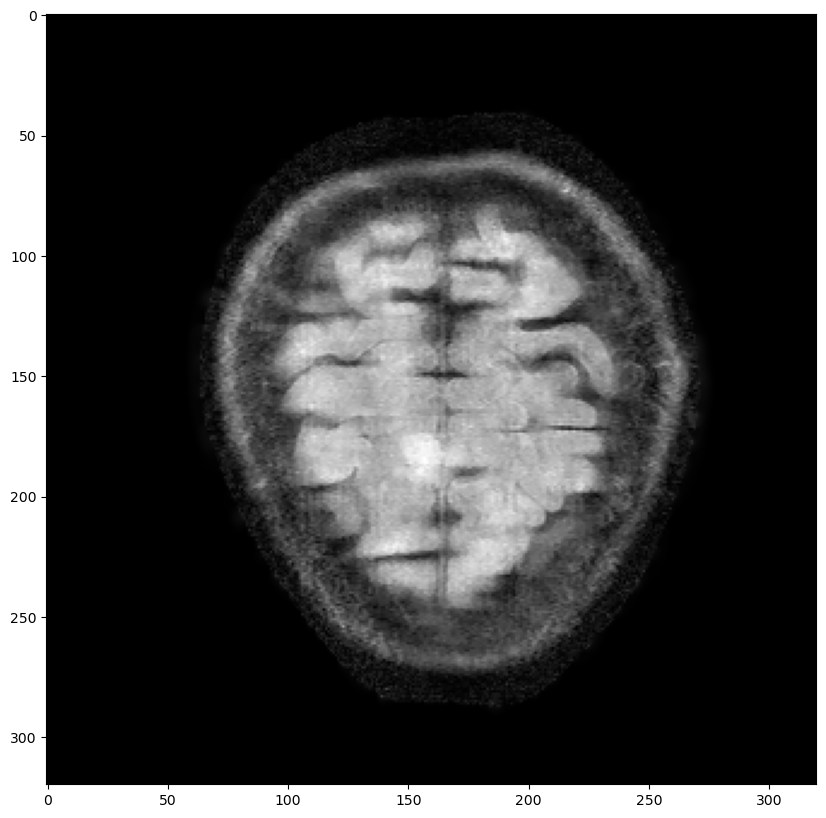

In [181]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(cs_slice_reconstruction, cmap='gray')

## Varnet

In [182]:
hf = h5py.File(image_base_dir + "/outputs/varnet/reconstructions/" + image_name)

In [183]:
print('Keys:', list(hf.keys()))
print('Attrs:', dict(hf.attrs))

Keys: ['reconstruction']
Attrs: {}


We don't have `kspace` key anymore, now we have to use `reconstruction` key.

`Reconstruction` volume has the following shape: (number of slices, height, width).

In [184]:
varnet_volume_reconstruction = hf['reconstruction'][()]
print(varnet_volume_reconstruction.dtype)
print(varnet_volume_reconstruction.shape)

float32
(16, 320, 320)


In [185]:
varnet_slice_reconstruction = varnet_volume_reconstruction[mri_slice] # Choosing slice
print(varnet_slice_reconstruction.shape)

(320, 320)


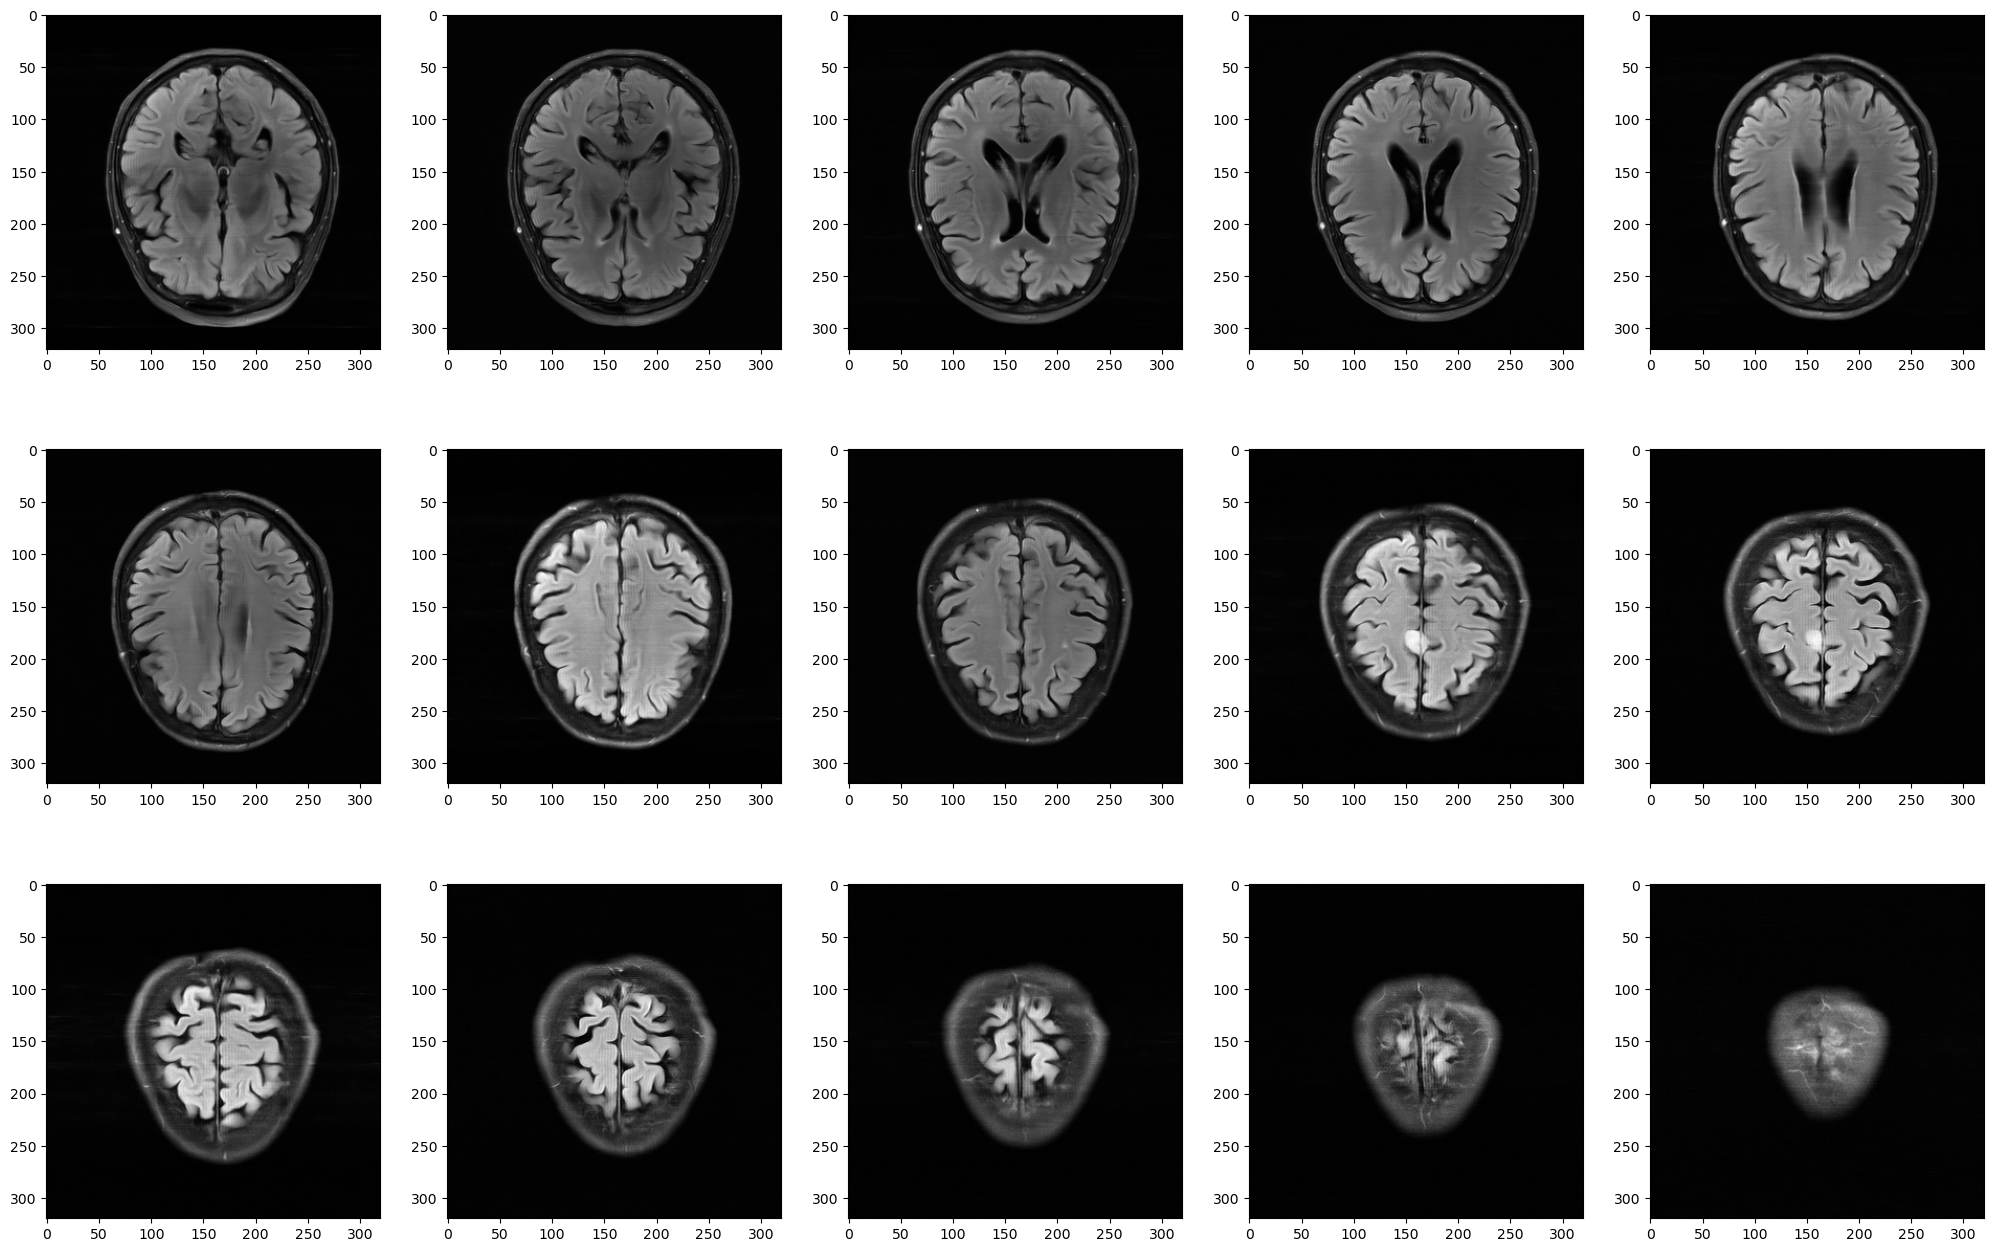

In [186]:
plt.rcParams['figure.figsize'] = [25, 16] # enlarge inline plots

show_slices(varnet_volume_reconstruction, 15, cmap='gray')

# fig = plt.figure()
# plt.imshow(slice_reconstruction, cmap='gray')

Let's show 10th slice.

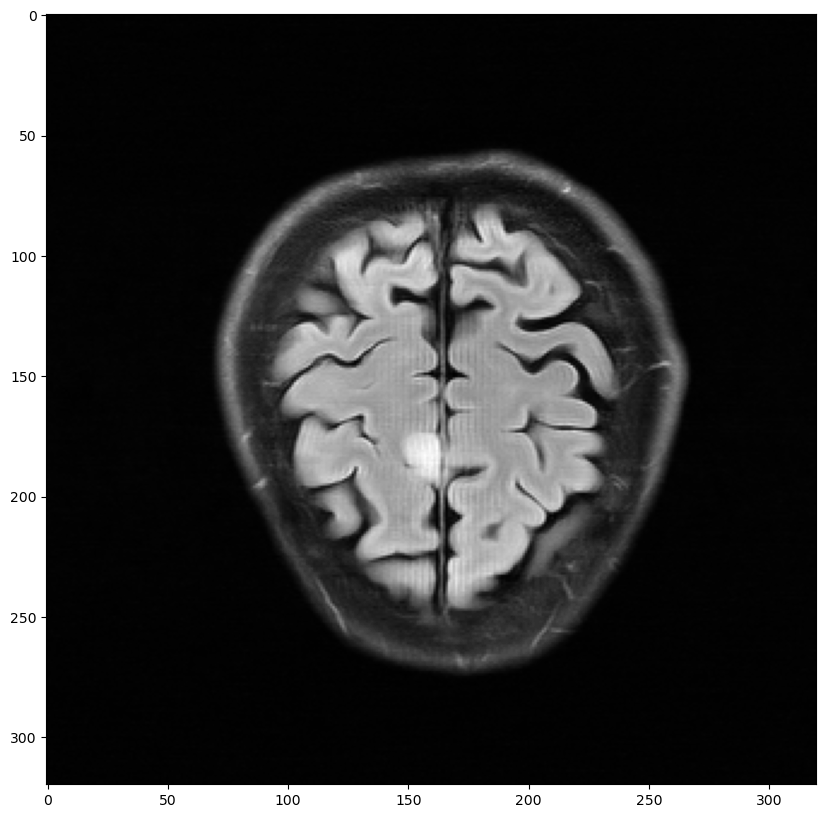

In [187]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(varnet_slice_reconstruction, cmap='gray')

## U-Net

In [188]:
hf = h5py.File(image_base_dir + "/outputs/unet/reconstructions/" + image_name)

In [189]:
print('Keys:', list(hf.keys()))
print('Attrs:', dict(hf.attrs))

Keys: ['reconstruction']
Attrs: {}


We don't have `kspace` key anymore, now we have to use `reconstruction` key.

`Reconstruction` volume has the following shape: (number of slices, height, width).

In [190]:
unet_volume_reconstruction = hf['reconstruction'][()]
print(unet_volume_reconstruction.dtype)
print(unet_volume_reconstruction.shape)

float32
(16, 1, 320, 320)


In [191]:
unet_slice_reconstruction = unet_volume_reconstruction[mri_slice] # Choosing slice
print(unet_slice_reconstruction.shape)

(1, 320, 320)


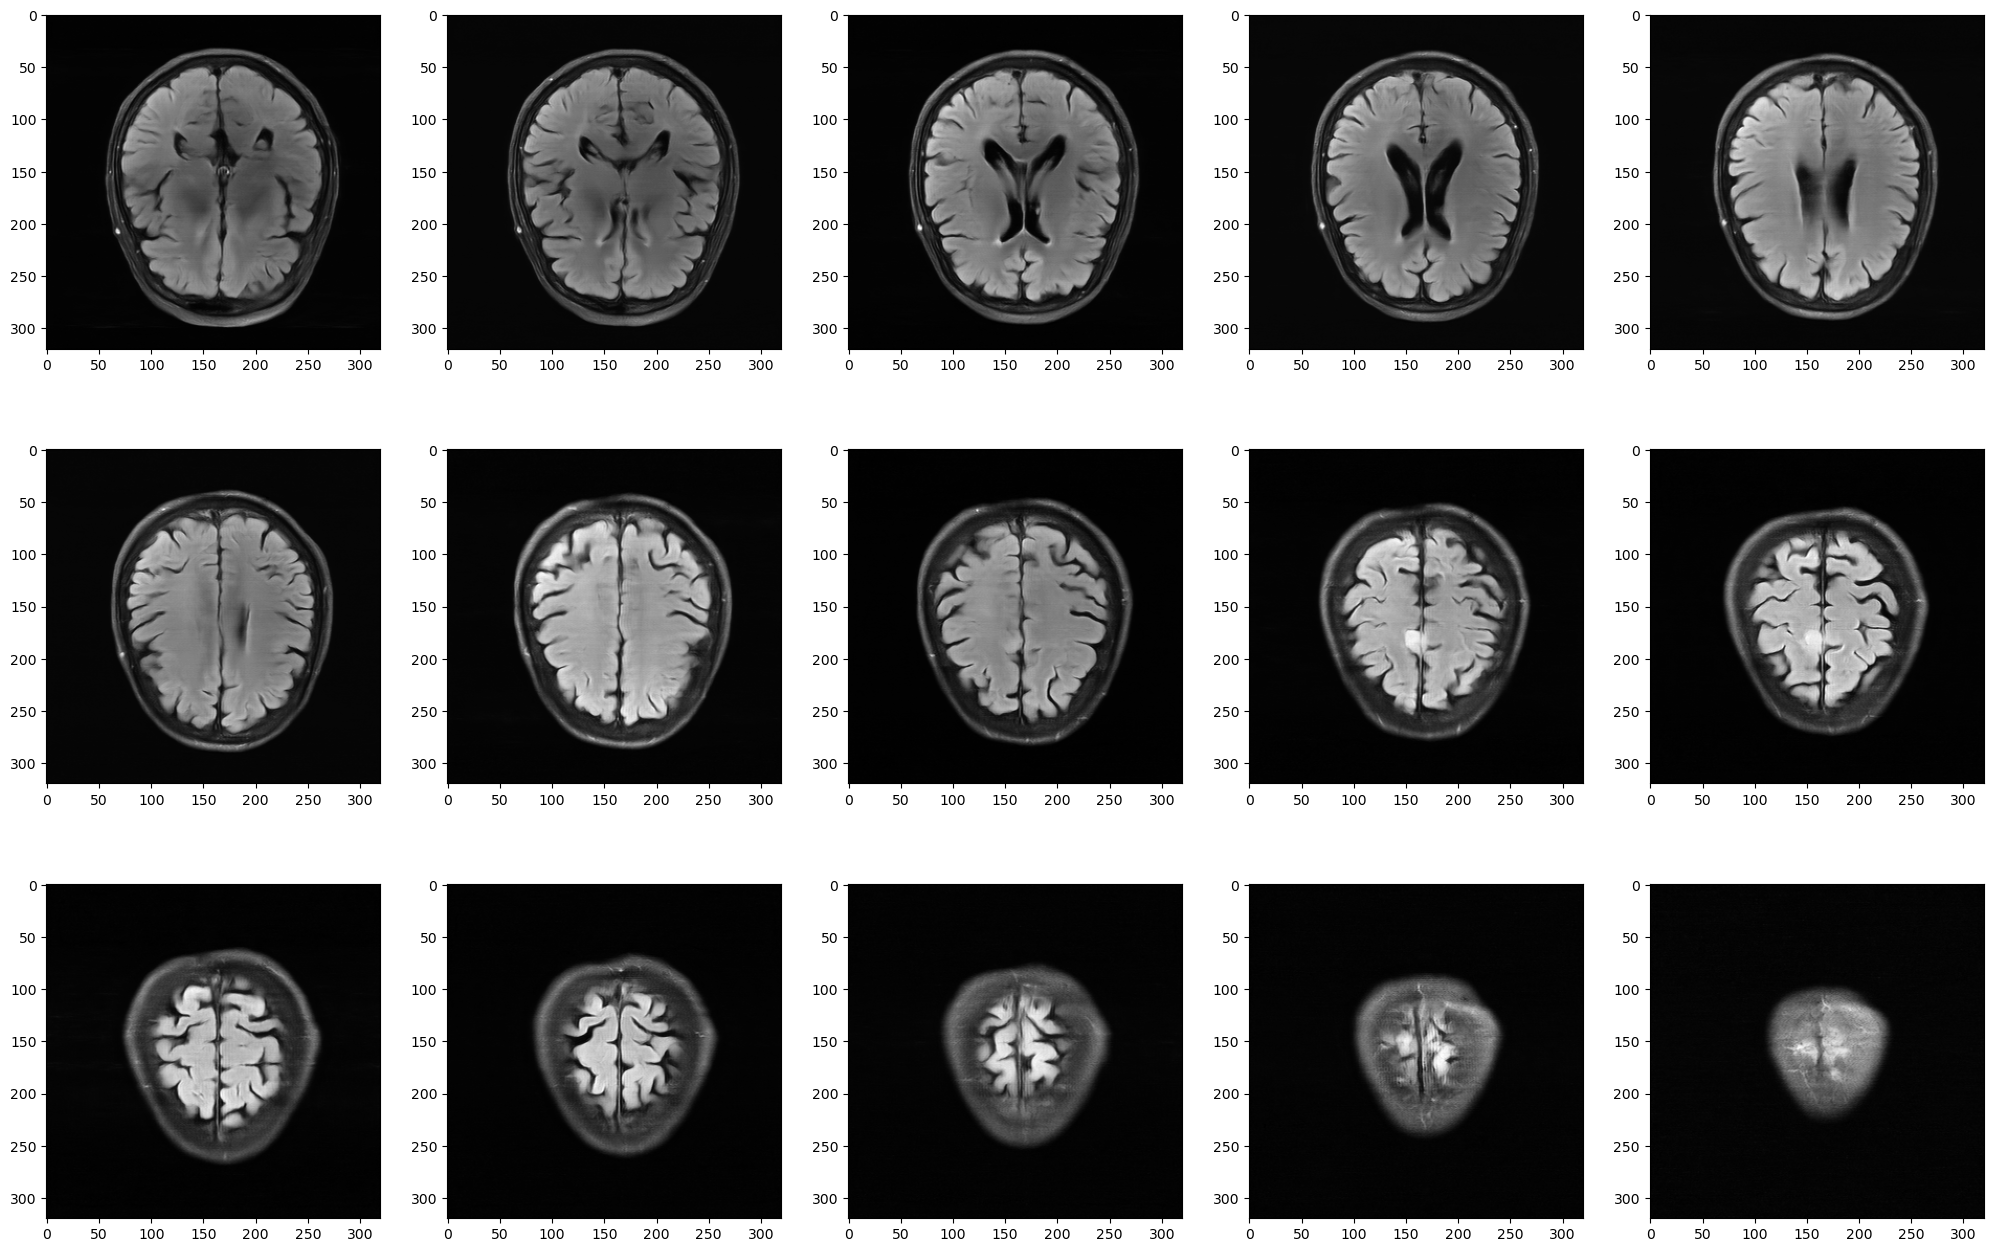

In [192]:
plt.rcParams['figure.figsize'] = [25, 16] # enlarge inline plots

show_slices(unet_volume_reconstruction.reshape(16, 320, 320), 15, cmap='gray')

Let's show 10th slice.

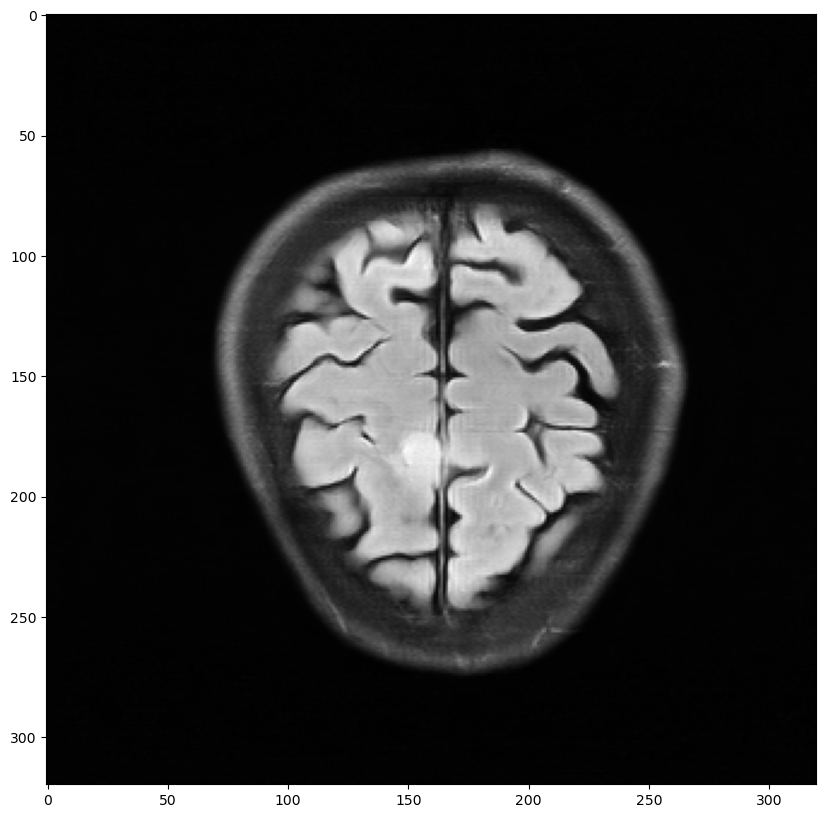

In [193]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(unet_slice_reconstruction.reshape(320,320), cmap='gray')